In [7]:
import numpy as np
import pandas as pd
import opendatasets as od
import seaborn as sns
import time
import re

from matplotlib import pyplot as plt

from ai_essay_prediction_misha.pipeline import manager, entities_data as e

In [8]:
IN_PYCHARM_NOW = True

In [9]:
if IN_PYCHARM_NOW:
    dataset_name = 'out-after-filter-essayaiprediction'
    name_csv_file = 'df_after_filtering.csv'

    dataset_url = f'https://www.kaggle.com/datasets/goopy7/{dataset_name}/{name_csv_file}'
    #'https://www.kaggle.com/datasets/goopy7/out-after-filter-essayaiprediction/df_after_filtering.csv'
    od.download(dataset_url, data_dir= '.')

    #df_pop = pd.read_csv('./out-after-filter-essayaiprediction/df_after_filtering.csv')
    df_pop = pd.read_csv(f'./{dataset_name}/{name_csv_file}')



else:
    df_pop = pd.read_csv('/kaggle/input/data-filter/df_after_filtering.csv')

print(df_pop.source.value_counts())
df_pop

Skipping, found downloaded files in ".\out-after-filter-essayaiprediction" (use force=True to force download)
source
human_essays_by_misha                  7270
persaude_corpus                        4000
train_essays                           1378
jelts                                  1274
intel_neural_chat_7b                   1000
daigt_external                         1000
llama_70b_v1                           1000
claude                                 1000
llama2_chat                            1000
mistral7binstruct_v1                   1000
palm                                   1000
argugpt                                1000
chat_gpt_moth                          1000
falcon_180b_v1                         1000
mistral7binstruct_v2                   1000
mistral7B_CME                          1000
darragh_claude_v6                      1000
gpt_3_5_turbo                           500
mistralai/Mistral-7B-Instruct-v0.1      400
NousResearch/Llama-2-7b-chat-hf         400
coh

,text,generated,source
0,\n\nTitle: A Revolutionary Transformation in M...,1.0,intel_neural_chat_7b
1,"\n\nFor some people, being labeled as extraord...",1.0,intel_neural_chat_7b
2,"\n\nTo begin, it's important to understand how...",1.0,intel_neural_chat_7b
3,\n\nIntroduction: Surfing has been largely ass...,1.0,intel_neural_chat_7b
4,\n\n\n\nIntroduction: The Concept of Driverles...,1.0,intel_neural_chat_7b
...,...,...,...
29120,Title: The Benefits of Limiting Car Usage: A M...,1.0,gpt_4_turbo
29121,The Electoral College is a unique system of el...,1.0,generated_by_misha_with_gpt_3_and_4
29122,Limiting car usage can have several advantages...,1.0,generated_by_misha_with_gpt_3_and_4
29123,"Dear Senator,\nI am writing to express my view...",1.0,generated_by_misha_with_gpt_3_and_4


In [10]:
df_sam = df_pop.sample(3000).reset_index(drop=True)

In [5]:
pipeline = manager.create_main_pipeline(False)
pipeline

AssertionError: 

In [6]:
X = df_sam.drop(columns='generated')
y = df_sam['generated']

X = pipeline.fit_transform(X)
X

LowerText(column_out='corrected_text', text_column='text')

0.0305483341217041 - spent time


,text,source,corrected_text
0,\nBoth teacher-designed and student-designed s...,darragh_claude_v6,\nboth teacher-designed and student-designed s...
1,I disagree with the principal's decision that ...,claude,i disagree with the principal's decision that ...
2,"Dear State Senator, After experiencing the dis...",train_essays,"dear state senator, after experiencing the dis..."


CountAmountLettersInText(column_out='n_letters', text_column='corrected_text')

0.0009999275207519531 - spent time


,text,source,corrected_text,n_letters
0,\nBoth teacher-designed and student-designed s...,darragh_claude_v6,\nboth teacher-designed and student-designed s...,1989
1,I disagree with the principal's decision that ...,claude,i disagree with the principal's decision that ...,1832
2,"Dear State Senator, After experiencing the dis...",train_essays,"dear state senator, after experiencing the dis...",1822


CountAmountEveryLetterInText(columns_out={'\n', '\r', ' ', '!', '"', '#', '$',
                                          '%', '&', "'", '(', ')', '*', '+',
                                          ',', '-', '.', '/', '0', '1', '2',
                                          '3', '4', '5', '6', '7', '8', '9',
                                          ':', ';', ...},
                             text_column='corrected_text')

1.2313909530639648 - spent time


,text,source,corrected_text,n_letters,س,"""",,该,ش,路,...,a,ō,و,´,–,9,‍,ý,®,ง
0,\nBoth teacher-designed and student-designed s...,darragh_claude_v6,\nboth teacher-designed and student-designed s...,1989,0,2,0,0,0,0,...,99,0,0,0,0,0,0,0,0,0
1,I disagree with the principal's decision that ...,claude,i disagree with the principal's decision that ...,1832,0,0,0,0,0,0,...,125,0,0,0,0,0,0,0,0,0
2,"Dear State Senator, After experiencing the dis...",train_essays,"dear state senator, after experiencing the dis...",1822,0,0,0,0,0,0,...,118,0,0,0,0,0,0,0,0,0


SeparatingTextIntoSentences(column_out='sentences_corrected_text',
                            text_column='corrected_text')

1.5025386810302734 - spent time


,text,source,corrected_text,n_letters,س,"""",,该,ش,路,...,ō,و,´,–,9,‍,ý,®,ง,sentences_corrected_text
0,\nBoth teacher-designed and student-designed s...,darragh_claude_v6,\nboth teacher-designed and student-designed s...,1989,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[\nboth teacher-designed and student-designed ...
1,I disagree with the principal's decision that ...,claude,i disagree with the principal's decision that ...,1832,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[i disagree with the principal's decision that...
2,"Dear State Senator, After experiencing the dis...",train_essays,"dear state senator, after experiencing the dis...",1822,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[dear state senator, after experiencing the di..."


CreateAmountSentences(column_out='n_sentences',
                      column_with_sentences='sentences_corrected_text')

0.0010006427764892578 - spent time


,text,source,corrected_text,n_letters,س,"""",,该,ش,路,...,و,´,–,9,‍,ý,®,ง,sentences_corrected_text,n_sentences
0,\nBoth teacher-designed and student-designed s...,darragh_claude_v6,\nboth teacher-designed and student-designed s...,1989,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,[\nboth teacher-designed and student-designed ...,15.0
1,I disagree with the principal's decision that ...,claude,i disagree with the principal's decision that ...,1832,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[i disagree with the principal's decision that...,16.0
2,"Dear State Senator, After experiencing the dis...",train_essays,"dear state senator, after experiencing the dis...",1822,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[dear state senator, after experiencing the di...",12.0


UserRegExp(column_text='corrected_text', columns_out=set(),
           reg_exp=re.compile('[a-z]+([a-z]{2})\\W'), suffix='_0')

1.262148141860962 - spent time


,text,source,corrected_text,n_letters,س,"""",,该,ش,路,...,oq_0,qt_0,mr_0,bf_0,cf_0,tk_0,zl_0,yf_0,db_0,jt_0
0,\nBoth teacher-designed and student-designed s...,darragh_claude_v6,\nboth teacher-designed and student-designed s...,1989,0,2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I disagree with the principal's decision that ...,claude,i disagree with the principal's decision that ...,1832,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Dear State Senator, After experiencing the dis...",train_essays,"dear state senator, after experiencing the dis...",1822,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


UserRegExp(column_text='corrected_text', columns_out=set(),
           reg_exp=re.compile('[a-z]+([a-z]{3})\\W'), suffix='_1')

2.4867379665374756 - spent time


,text,source,corrected_text,n_letters,س,"""",,该,ش,路,...,uar_1,hng_1,hno_1,xix_1,ndh_1,yat_1,dng_1,sss_1,eou_1,loc_1
0,\nBoth teacher-designed and student-designed s...,darragh_claude_v6,\nboth teacher-designed and student-designed s...,1989,0,2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I disagree with the principal's decision that ...,claude,i disagree with the principal's decision that ...,1832,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Dear State Senator, After experiencing the dis...",train_essays,"dear state senator, after experiencing the dis...",1822,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


UserRegExp(column_text='corrected_text', columns_out=set(),
           reg_exp=re.compile('([a-z]\\W[a-z])'), suffix='_2')

2.027834415435791 - spent time


,text,source,corrected_text,n_letters,س,"""",,该,ش,路,...,r/p_2,e–e_2,c-g_2,a`s_2,m—w_2,d/g_2,f b_2,e+b_2,c-p_2,y`s_2
0,\nBoth teacher-designed and student-designed s...,darragh_claude_v6,\nboth teacher-designed and student-designed s...,1989,0,2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I disagree with the principal's decision that ...,claude,i disagree with the principal's decision that ...,1832,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Dear State Senator, After experiencing the dis...",train_essays,"dear state senator, after experiencing the dis...",1822,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DivideMatrixIntoVector(column_divides='n_letters',
                       columns_divided=[{'\n', '\r', ' ', '!', '"', '#', '$',
                                         '%', '&', "'", '(', ')', '*', '+', ',',
                                         '-', '.', '/', '0', '1', '2', '3', '4',
                                         '5', '6', '7', '8', '9', ':', ';', ...},
                                        set()],
                       columns_out=[{'\n', '\r', ' ', '!', '"', '#', '$', '%',
                                     '&', "'", '(', ')', '*', '+', ',', '-',
                                     '.', '/', '0', '1', '2', '3', '4', '5',
                                     '6', '7', '8', '9', ':', ';', ...},
                                    set()])

0.02803802490234375 - spent time


,text,source,corrected_text,n_letters,س,"""",,该,ش,路,...,r/p_2,e–e_2,c-g_2,a`s_2,m—w_2,d/g_2,f b_2,e+b_2,c-p_2,y`s_2
0,\nBoth teacher-designed and student-designed s...,darragh_claude_v6,\nboth teacher-designed and student-designed s...,1989,0.0,0.001006,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I disagree with the principal's decision that ...,claude,i disagree with the principal's decision that ...,1832,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Dear State Senator, After experiencing the dis...",train_essays,"dear state senator, after experiencing the dis...",1822,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DropperColumns(columns_to_drop={'n_letters', 'n_sentences',
                                'sentences_corrected_text'})

0.05229544639587402 - spent time


,text,source,corrected_text,س,"""",,该,ش,路,‘,...,r/p_2,e–e_2,c-g_2,a`s_2,m—w_2,d/g_2,f b_2,e+b_2,c-p_2,y`s_2
0,\nBoth teacher-designed and student-designed s...,darragh_claude_v6,\nboth teacher-designed and student-designed s...,0.0,0.001006,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I disagree with the principal's decision that ...,claude,i disagree with the principal's decision that ...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Dear State Senator, After experiencing the dis...",train_essays,"dear state senator, after experiencing the dis...",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,text,source,corrected_text,س,"""",,该,ش,路,‘,...,r/p_2,e–e_2,c-g_2,a`s_2,m—w_2,d/g_2,f b_2,e+b_2,c-p_2,y`s_2
0,\nBoth teacher-designed and student-designed s...,darragh_claude_v6,\nboth teacher-designed and student-designed s...,0.0,0.001006,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I disagree with the principal's decision that ...,claude,i disagree with the principal's decision that ...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Dear State Senator, After experiencing the dis...",train_essays,"dear state senator, after experiencing the dis...",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,It is true that artificial activities cause te...,jelts,it is true that artificial activities cause te...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Seeking multiple opinions when making importan...,claude,seeking multiple opinions when making importan...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,cowboy riding wave article essay \ni was never...,cohere-command,cowboy riding wave article essay \ni was never...,0.0,0.001679,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,"Dear Senator,\n\nIm sorry to say this but the ...",persaude_corpus,"dear senator,\n\nim sorry to say this but the ...",0.0,0.006270,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,Trouble began to arise in England and France w...,human_essays_by_misha,trouble began to arise in england and france w...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,The Second World War was the most barbarous an...,human_essays_by_misha,the second world war was the most barbarous an...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


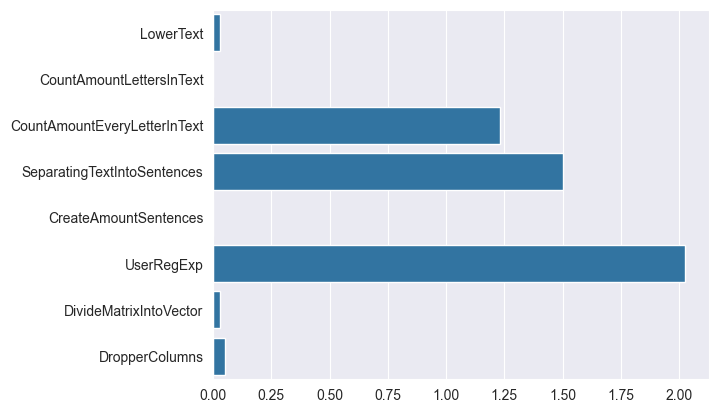

In [7]:
sns.barplot(y=e.spend_time_for_transform_dic.keys(), x=e.spend_time_for_transform_dic.values());

In [8]:
cor_vec = X.iloc[:, 3:].corrwith(y)

borders = (-0.1, 0.1)
needed_columns = cor_vec[(cor_vec<borders[0]) | (cor_vec>borders[1])].index
needed_columns

Index(['‘', 'i', 'w', '8', ';', ' ', 'p', '’', 'h', 'n', ' ', '6', ')', '4',
       'v', '…', '[', 't', '\n', '“', '7', 'l', '3', '5', '-', '1', 'r', 'j',
       ''', 'c', 'b', '(', '2', '0', 'y', ',', '”', 's', ']', 'a', '9'],
      dtype='object')

In [9]:
X[needed_columns]

,‘,i,w,8,;,,p,’,h,n,...,(,2,0,y,",",”,s,],a,9
0,0.0,0.053796,0.015083,0.00000,0.000000,0.000000,0.019608,0.000000,0.036702,0.061337,...,0.000000,0.000000,0.000000,0.008044,0.005530,0.00000,0.058824,0.0,0.049774,0.000000
1,0.0,0.081332,0.008734,0.00000,0.000000,0.000000,0.021288,0.000000,0.020197,0.062227,...,0.000000,0.000000,0.000000,0.011463,0.004367,0.00000,0.057314,0.0,0.068231,0.000000
2,0.0,0.059276,0.014270,0.00000,0.000000,0.000000,0.014819,0.000000,0.041712,0.052689,...,0.000000,0.001098,0.006037,0.010428,0.002195,0.00000,0.046652,0.0,0.064764,0.000000
3,0.0,0.067785,0.016107,0.00000,0.000000,0.000000,0.022819,0.000000,0.038926,0.047651,...,0.000000,0.001342,0.000000,0.009396,0.011409,0.00000,0.063758,0.0,0.067785,0.000000
4,0.0,0.065208,0.012012,0.00000,0.000000,0.000000,0.025740,0.000000,0.027456,0.064350,...,0.000000,0.000000,0.000000,0.022308,0.008151,0.00000,0.051480,0.0,0.059202,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.052057,0.024349,0.00000,0.000000,0.000000,0.014274,0.000000,0.033585,0.048699,...,0.000000,0.000000,0.000000,0.019312,0.010076,0.00000,0.041142,0.0,0.068010,0.000000
2996,0.0,0.044410,0.020899,0.00000,0.000000,0.001567,0.011494,0.000000,0.039707,0.041797,...,0.001045,0.001567,0.004180,0.014107,0.009927,0.00000,0.055381,0.0,0.053814,0.001045
2997,0.0,0.060097,0.013658,0.00021,0.000210,0.000000,0.018281,0.001681,0.041816,0.063459,...,0.002522,0.000841,0.000841,0.011557,0.009456,0.00021,0.048960,0.0,0.067031,0.000420
2998,0.0,0.055419,0.019671,0.00000,0.000000,0.000000,0.016834,0.000000,0.033478,0.057689,...,0.000378,0.000189,0.000567,0.013618,0.004539,0.00000,0.057121,0.0,0.068281,0.000378


In [10]:
X.iloc[:, 3:].corrwith(y).sort_values()

h    -0.477537
     -0.354411
’    -0.306276
“    -0.275674
”    -0.275026
        ...   
i     0.234844
n     0.245948
\n    0.269646
,     0.282862
c     0.330975
Length: 5615, dtype: float64

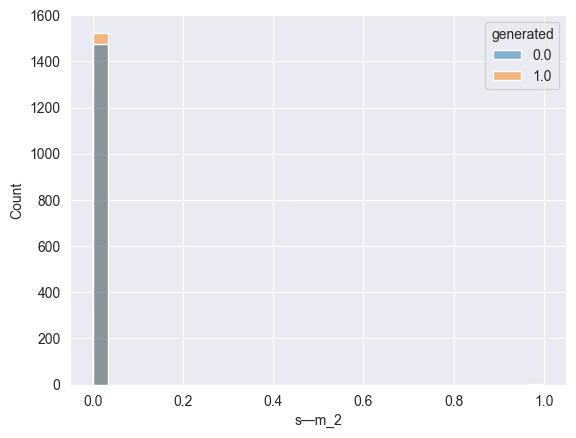

<Axes: xlabel='s—m_2', ylabel='h'>

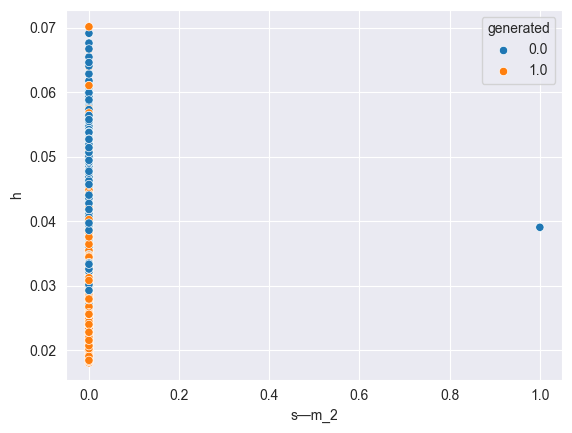

In [13]:
x_column = 's—m_2'
y_column = 'h'

sns.histplot(data=X, x=x_column, hue=y, bins=30)
plt.show()
sns.scatterplot(data=X, x=x_column, y=y_column, hue=y)